# IN_SYS - SW06 - Multiple Linear Regression with Advertising Data
### 21/10/2024 - Eugen Rodel

### Goals: 
- Introduction into Multiple Linear Regression
- Repeat old topics as importing data from CSV file into Pandas, exploring and visualization of data, train model, make predictions


# 1. Description of the data

**Preparation:** Download the file 'Advertising.csv' from ILIAS to your laptop 

The data set consists of 4 colums, three independent input variables (TV, Radio, Newspaper) and one dependent variable (Sales):

**TV**:

This column represents the advertising budget allocated to TV in thousands of CHF.
It indicates how much money was spent on TV commercials to promote the product.

**Radio**:

This column represents the advertising budget spent on Radio in thousands of CHF.
It indicates how much was allocated to radio advertising to reach potential customers.

**Newspaper**:

This column represents the advertising budget for Newspapers in thousands of CHF.
It indicates the spending on newspaper ads to market the product.

**Sales**:

This column represents the Sales of the product in thousands of units.
This is the **dependent variable** we are trying to predict in our regression model. It shows how much the product was sold, and our goal is to see how the different advertising channels (TV, radio, newspaper) contribute to these sales.





# 2. Load the necessary libraries: pandas, matplotlib, seaborn, sklearn (train_test_split, LinearRegression, mean_squared_error, r2_score)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set Seaborn style for plots
sns.set_style('whitegrid')

# 3. Load the 'Advertising.csv' file into a Pandas Dataframe called 'advertising_df'
Hint: **no** special options are needed to load the data, just a simple read
Display first 5 rows of advertising_df to verify, that import worked

In [2]:
# Load the uploaded data from the CSV file
advertising_df = pd.read_csv('Advertising_2.csv',sep=';')

# Display the first few rows of the DataFrame to verify that the import worked
advertising_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Goal for this Multiple Linear Regression Project: find the optimal parameters for this formular

## **Sales = β₀ + β₁ * TV + β₂ * Radio + β₃ * Newspaper**


.

# 4. Data Exploration and Visualization

In [3]:
# check how many rows and columns we have in titanic_df
advertising_df.shape

(200, 5)

In [4]:
advertising_df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
# Drop the unnecessary column 'Unnamed: 0' to clean up the data
advertising_df = advertising_df.drop(columns=['Unnamed: 0'])

advertising_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
advertising_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Heatmap: 
Displays the correlation between features. This helps us see which features are most correlated with sales.

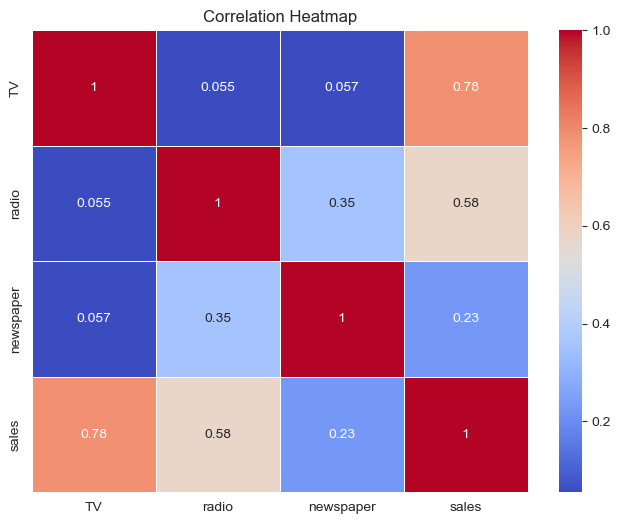

In [7]:
# Heatmap to show the correlation between features
plt.figure(figsize=(8, 6))   # Set the plot size in inch: figsize(width, height)
sns.heatmap(advertising_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Scatterplot, to visualize the correlation between two variables

**Question**: based on the heatmap data above, what do you expect for the scatter plot of TV vs Radio advertising?

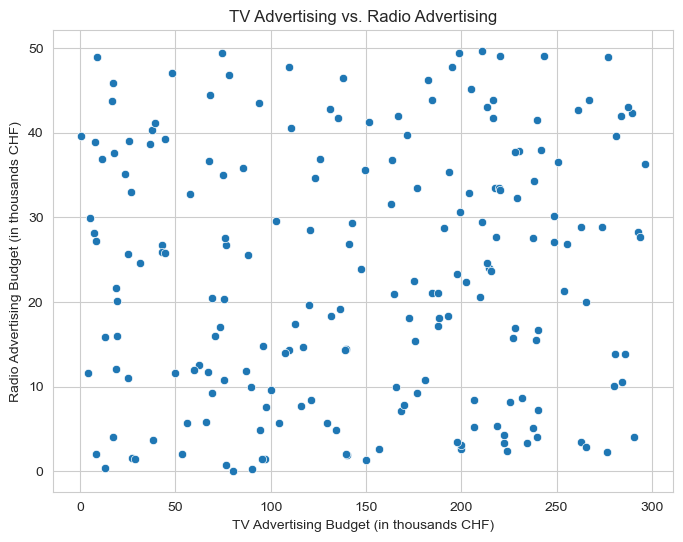

In [8]:
# Scatter plot of TV advertising vs. Radio advertising using circles (dots)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=advertising_df, x='TV', y='radio', marker='o')
plt.title('TV Advertising vs. Radio Advertising')
plt.xlabel('TV Advertising Budget (in thousands CHF)')
plt.ylabel('Radio Advertising Budget (in thousands CHF)')
plt.show()

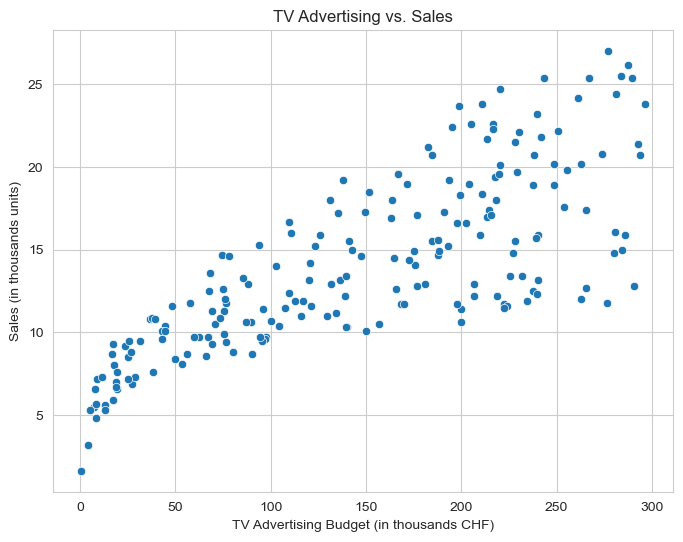

In [9]:
# Scatter plot of TV advertising vs. Sales using circles (dots)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=advertising_df, x='TV', y='sales', marker='o')
plt.title('TV Advertising vs. Sales')
plt.xlabel('TV Advertising Budget (in thousands CHF)')
plt.ylabel('Sales (in thousands units)')
plt.show()


## Pairplot

to visualize the relationship between all features

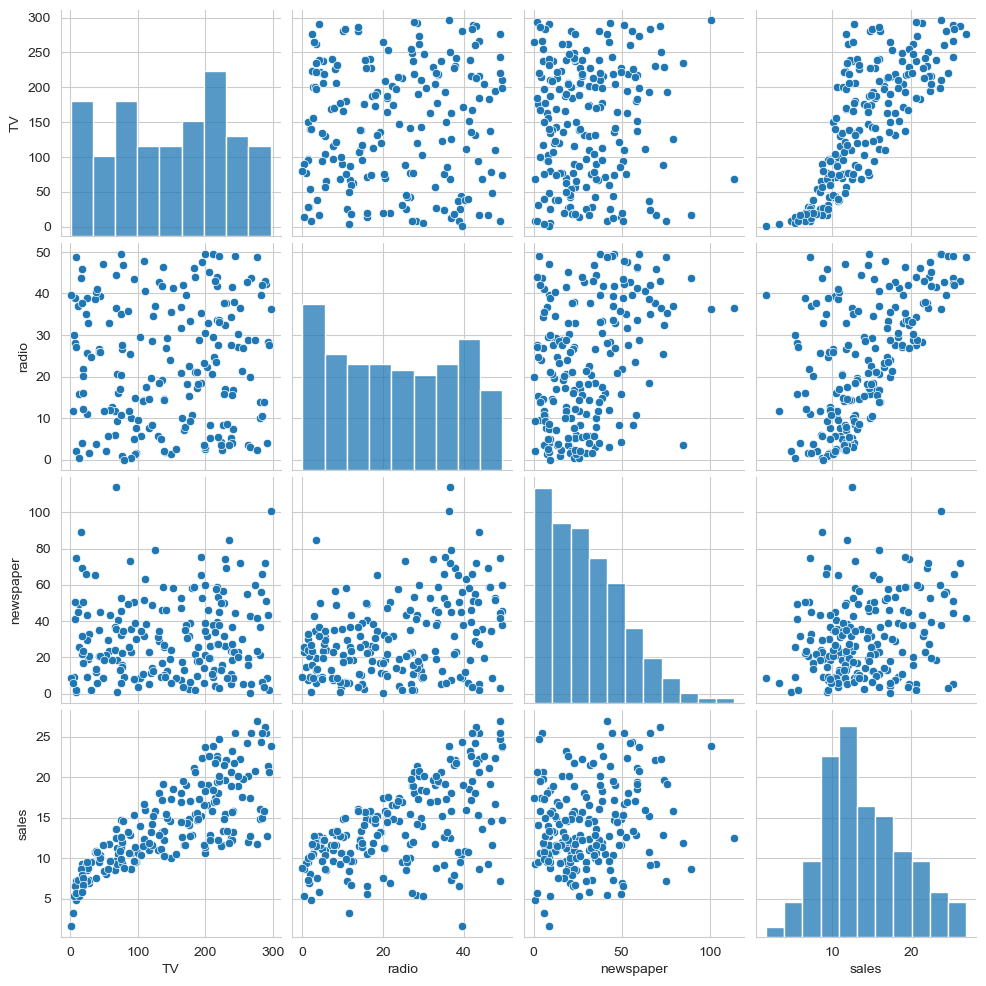

In [10]:
# Pairplot to visualize the relationships between all features
sns.pairplot(advertising_df)
plt.show()

## Create Box Plots for each of the four features, but group them in one plot

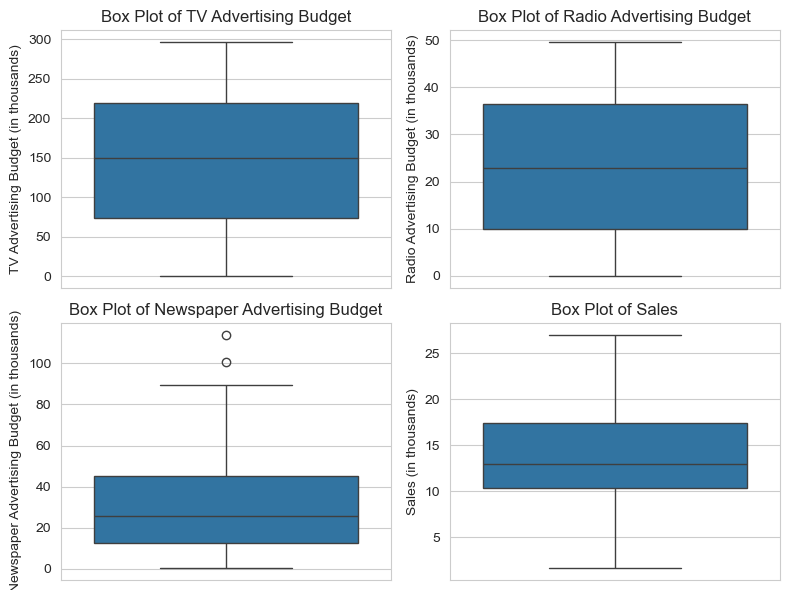

In [11]:
# Box plots for all features in the dataset
plt.figure(figsize=(8, 6))

# Box plot for TV Advertising Budget
plt.subplot(2, 2, 1)
sns.boxplot(data=advertising_df, y='TV')
plt.title('Box Plot of TV Advertising Budget')
plt.ylabel('TV Advertising Budget (in thousands)')

# Box plot for Radio Advertising Budget
plt.subplot(2, 2, 2)
sns.boxplot(data=advertising_df, y='radio')
plt.title('Box Plot of Radio Advertising Budget')
plt.ylabel('Radio Advertising Budget (in thousands)')

# Box plot for Newspaper Advertising Budget
plt.subplot(2, 2, 3)
sns.boxplot(data=advertising_df, y='newspaper')
plt.title('Box Plot of Newspaper Advertising Budget')
plt.ylabel('Newspaper Advertising Budget (in thousands)')

# Box plot for Sales
plt.subplot(2, 2, 4)
sns.boxplot(data=advertising_df, y='sales')
plt.title('Box Plot of Sales')
plt.ylabel('Sales (in thousands)')

plt.tight_layout()
plt.show()

# 5. Multiple Linear Regression

## Split Data into Inndependent Input Data and Dependend Output Data

In [12]:
# Prepare the data: Define independent input features (X) and dependend output target (y)
X = advertising_df[['TV', 'radio', 'newspaper']]
y = advertising_df['sales']

# Assistant
The error occurs because you're trying to access multiple columns from the DataFrame using incorrect syntax. When selecting multiple columns from a pandas DataFrame, you need to use a list of column names inside square brackets.

Would you like me to provide the corrected code?

## Split data into train and test data

In [13]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [14]:
# Initialize and train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Use trained modek for prediction, input is the test data

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Evaluation of the trained model 

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
# print out the input data and the predicted sales

# Input data for prediction (the test data):
print(X_test)

        TV  radio  newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3       14.2
82    75.3   20.3       32.5
68   237.4   27.5       11.0
124  229.5   32.3       74.2
16    67.8   36.6      114.0
148   38.0   40.3       11.9
93   250.9   36.5       72.3
65    69.0    9.3        0.9
60    53.5    2.0       21.4
84   213.5   43.0       33.8
67   139.3   14.5       10.2
125   87.2   11.8       25.9
132    8.4   27.2        2.1
9    199.8    2.6       21.2
18    69.2   20.5       18.3
55   198.9   49.4       60.0
75    16.9   4

In [18]:
# the predicted data for the test input data
print(y_pred)

[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


In [19]:
# To compare the predicted results from the Multiple Linear Regression Model with the real sales data 
# which we know from the original data in Advertising.csv, lets combine them in one new Pandas DataFrame

# Create a DataFrame from X_test
results_df = X_test.copy()

# Add the actual sales values to the new DataFrame results_df into a new column called "Actual Sales"
results_df['Actual Sales'] = y_test

# Add the predicted sales values to the new DataFrame results_df into a new column called "Predicted Sales"
results_df['Predicted Sales'] = y_pred

results_df.sort_index()

,TV,radio,newspaper,Actual Sales,Predicted Sales
9,199.8,2.6,21.2,10.6,12.466468
15,195.4,47.7,52.9,22.4,20.889882
16,67.8,36.6,114.0,12.5,13.251035
18,69.2,20.5,18.3,11.3,10.003377
30,292.9,28.3,43.2,21.4,21.553843
45,175.1,22.5,31.5,14.9,15.155070
55,198.9,49.4,60.0,23.7,21.387671
56,7.3,28.1,41.4,5.5,8.736284
60,53.5,2.0,21.4,8.1,5.809574
65,69.0,9.3,0.9,9.3,7.827403


In [20]:
# As an example, let's just plot one prediction vs actual sales, 
# so we just use the first row of results_df
first_row = results_df.sort_index().iloc[0]

first_row

TV                 199.800000
radio                2.600000
newspaper           21.200000
Actual Sales        10.600000
Predicted Sales     12.466468
Name: 9, dtype: float64

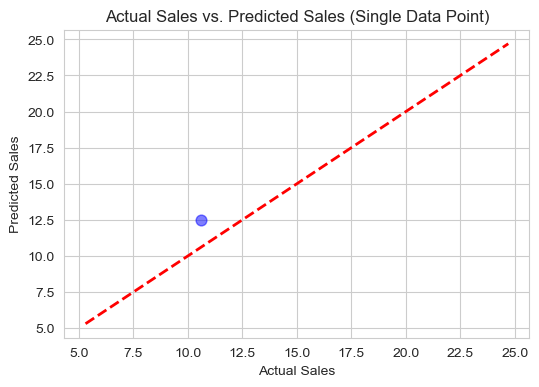

In [21]:
# Scatter plot: Actual Sales vs. Predicted Sales for the first data point
plt.figure(figsize=(6, 4))
plt.scatter(first_row['Actual Sales'], first_row['Predicted Sales'], color='blue', s=60, alpha=0.5,  marker='o')
plt.plot([results_df['Actual Sales'].min(), results_df['Actual Sales'].max()],
         [results_df['Actual Sales'].min(), results_df['Actual Sales'].max()],
         color='red', linestyle='--', linewidth=2)  # 45-degree reference line
plt.title('Actual Sales vs. Predicted Sales (Single Data Point)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

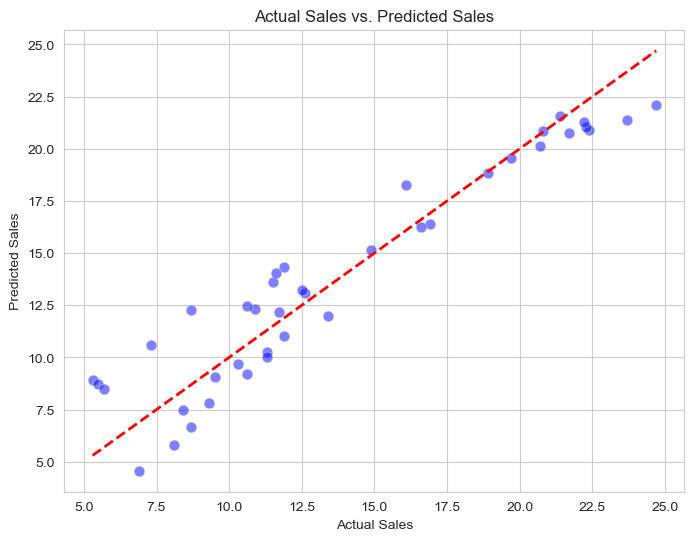

In [22]:
# Let's visualize the actaul sales vs the predicted sales for all test data

# Scatter plot: Actual Sales vs. Predicted Sales with enhanced markers for visibility
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results_df['Actual Sales'], y=results_df['Predicted Sales'], s=60, color='blue', alpha=0.5, marker='o')
plt.plot([results_df['Actual Sales'].min(), results_df['Actual Sales'].max()],
         [results_df['Actual Sales'].min(), results_df['Actual Sales'].max()],
         color='red', linestyle='--', linewidth=2)  # 45-degree line for reference
plt.title('Actual Sales vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model evaluation results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 3.17
R² Score: 0.90


### Model Evaluation Metrics

#### 1. **Mean Squared Error (MSE): 3.17**
- The **Mean Squared Error (MSE)** measures the **average squared difference** between the predicted values and the actual values.
- In our case, an MSE of **3.17** means that, on average, the **squared error** between the predicted sales and actual sales is **3.17**.
- The **lower** the MSE, the better the model's predictions are, as it means the predictions are closer to the actual values.

#### 2. **R² Score: 0.90**
- The **R² score**, also known as the **coefficient of determination**, measures how well the independent variables (TV, radio, newspaper advertising budgets) explain the variance in the dependent variable (sales).
- An R² score of **0.90** means that **90%** of the variability in sales can be explained by the advertising spending.
- The **closer the R² value is to 1**, the better the model explains the variance in the target variable. In this case, an R² score of **0.90** indicates a strong relationship between the advertising budgets and sales, meaning our model is performing well.

These metrics help us understand how well our model fits the data and can be used to predict future sales based on advertising spending.


## Residual Plot

For a good trained model the residual plot (the difference between trained and actual data) should be in a random pattern above and below the zero line.

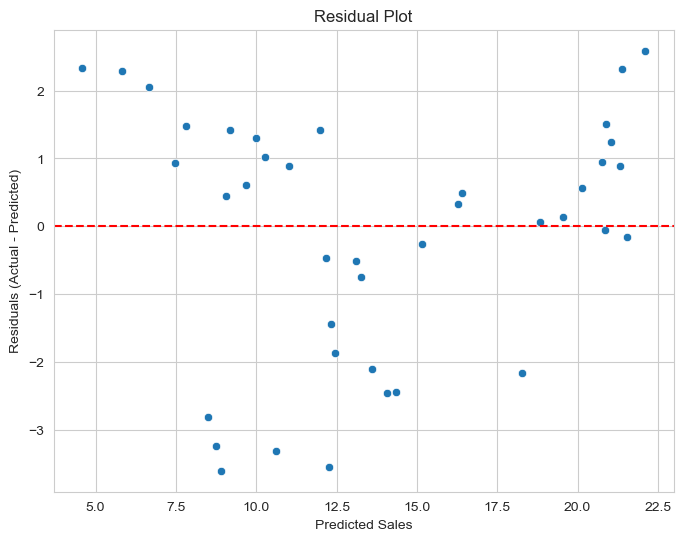

In [24]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()